In [7]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Exercise 1

In [9]:
# load the dataset
df = pd.read_csv('data/international-airline-passengers.csv')

# inspect it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month                  144 non-null object
Thousand Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [10]:
df.head()

,Month,Thousand Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [12]:
# convert the month field to a datetime object
df['Month'] = pd.to_datetime(df['Month'])

In [13]:
df.head()

,Month,Thousand Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [25]:
# set the index
df.set_index('Month', inplace=True)

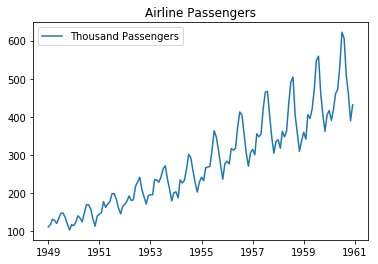

In [37]:
plt.plot(df)
plt.title('Airline Passengers')
plt.legend(['Thousand Passengers'])

# Exercise 2

In [38]:
df = pd.read_csv('data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [39]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


Text(0.5,1,'Weight/Height by Gender')

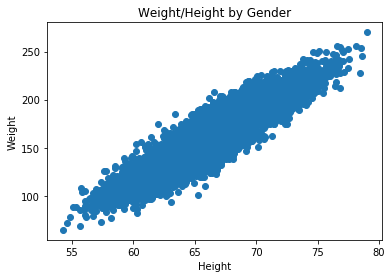

In [42]:
plt.scatter(df['Height'], df['Weight'])
plt.ylabel('Weight')
plt.xlabel('Height')

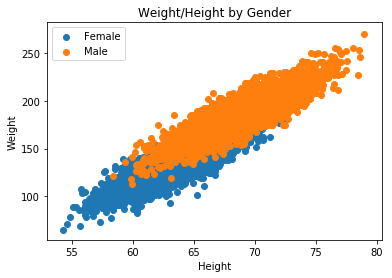

In [51]:
df_female = df[df['Gender'] == 'Female']
df_male = df[df['Gender'] == 'Male']
plt.scatter(df_female['Height'], df_female['Weight'])
plt.scatter(df_male['Height'], df_male['Weight'])
plt.ylabel('Weight')
plt.xlabel('Height')
plt.title('Weight/Height by Gender')
plt.legend(['Female', 'Male'])

# Exercise 3

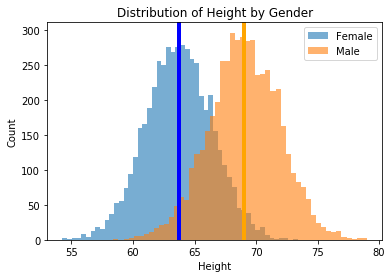

In [58]:
#df_male.plot(kind='hist', bins=50, title='Histogram', alpha=0.6, figsize=(16,10))
plt.hist(df_female['Height'], bins=50, alpha=0.6)
plt.hist(df_male['Height'], bins=50, alpha=0.6)
plt.title('Distribution of Height by Gender')
plt.legend(['Female', 'Male'])
plt.ylabel('Count')
plt.xlabel('Height')
male_mean = df_male['Height'].mean()
female_mean = df_female['Height'].mean()
plt.axvline(female_mean, color='blue', linewidth=4)
plt.axvline(male_mean, color='orange', linewidth=4)

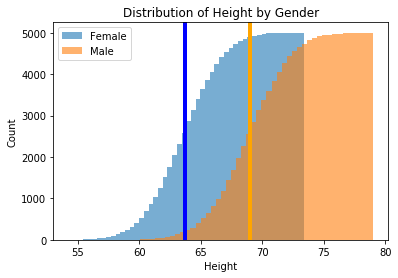

In [59]:
plt.hist(df_female['Height'], bins=50, alpha=0.6, cumulative=True)
plt.hist(df_male['Height'], bins=50, alpha=0.6, cumulative=True)
plt.title('Cumulative Distribution of Height by Gender')
plt.legend(['Female', 'Male'])
plt.ylabel('Count')
plt.xlabel('Height')
male_mean = df_male['Height'].mean()
female_mean = df_female['Height'].mean()
plt.axvline(female_mean, color='blue', linewidth=4)
plt.axvline(male_mean, color='orange', linewidth=4)

# Exercise 4

Text(0.5,1,'Weight Distribution by Gender')

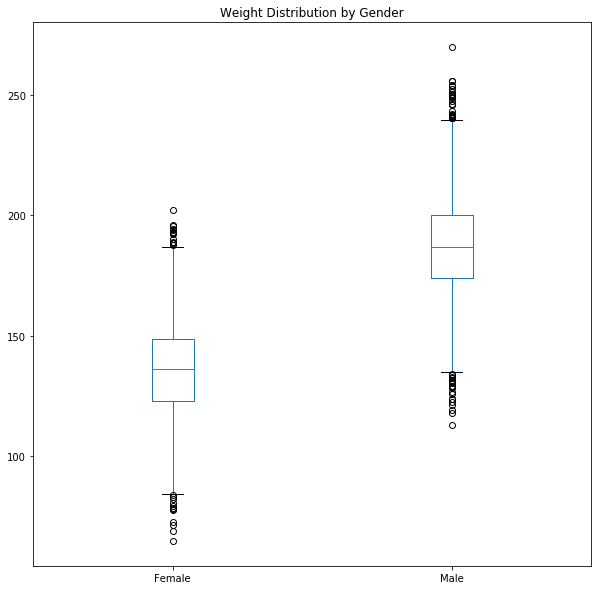

In [71]:
data = np.vstack([df_female['Weight'], df_male['Weight']]).transpose()
df = pd.DataFrame(data, columns=['Female', 'Male'])
df.plot(kind='box', title='Boxplot', figsize=(10,10))
plt.title('Weight Distribution by Gender')

# Exercise 5

In [72]:
df = pd.read_csv('data/titanic-train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00a6a86710>,
      dtype=object)

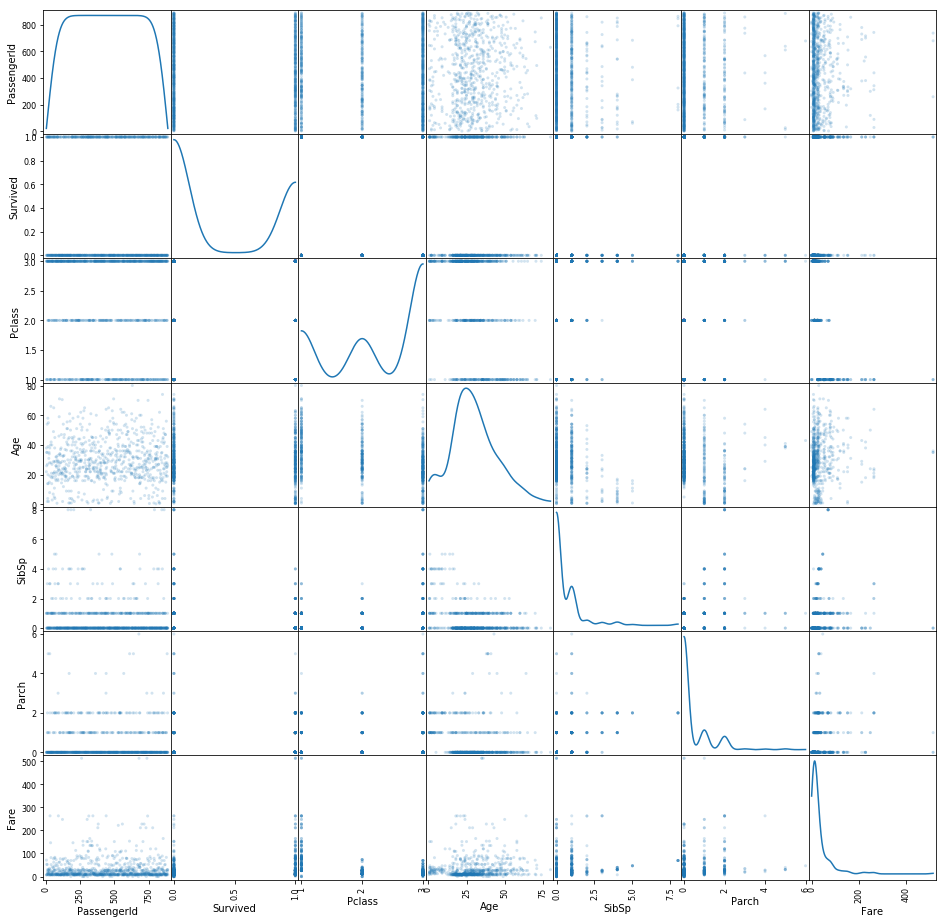

In [76]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(16, 16), diagonal='kde')